In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mystyle
plt.style.use(mystyle.ms)

In [2]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
ati = ati[ati.chainflag < 2]
print('We have {} stars'.format(len(ati)))
ati.head(5)

We have 55 stars


,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,nus,l_nus,u_nus,P,l_P,u_P,vsini,l_vsini,u_vsini,chainflag
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,1.671453,0.077993,0.142085,6.924557,0.542517,0.338926,11.433317,0.381059,0.410326,0
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,3.345075,0.061407,0.067532,3.460034,0.068470,0.064705,22.326220,0.344369,0.353935,0
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.424040,0.103948,0.269316,27.294770,10.601940,8.863835,1.646325,0.287377,0.264206,0
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,2.126247,0.103083,0.102136,5.443428,0.249496,0.277350,10.878801,0.588172,0.535923,0
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,1.034966,0.062735,0.065407,11.183052,0.664730,0.721602,8.102684,0.240131,0.228837,0


Exclude those stars with a Rhat > 1.1 flag and no results otherwise

In [3]:
ati = ati[np.isfinite(ati.nus.values)]
ati = ati[ati.flag != 'rhat_1' ]
print('We have {} stars'.format(len(ati)))

We have 54 stars


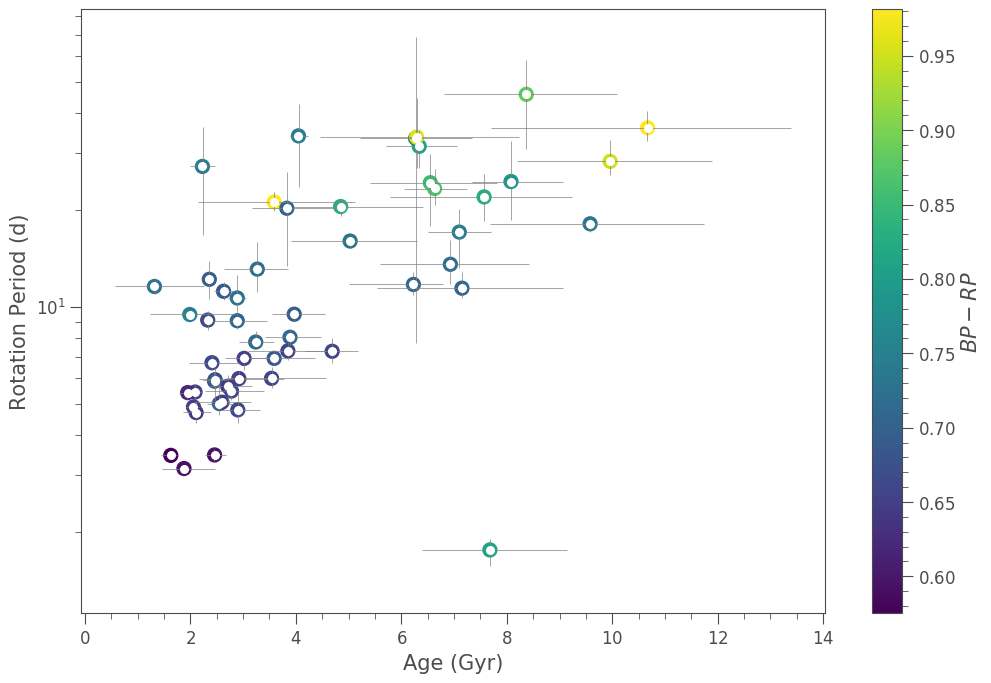

In [16]:
import mystyle as ms
with plt.style.context(ms.ms):
    fig, ax = plt.subplots(figsize=(12,8))
    c = ax.scatter(np.round(ati.age, 2), np.round(ati.P, 2), c='white', s=30, zorder=2)
    c = ax.scatter(np.round(ati.age, 2), np.round(ati.P, 2), c=ati.bprp.values, s=100, zorder=1)

    plt.errorbar(ati.age, ati.P, xerr=[ati.loage, ati.upage], yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')
    # ax.grid()
    ax.set_axisbelow(True)
    ax.set_xlabel('Age (Gyr)')
    ax.set_ylabel('Rotation Period (d)')
    fig.colorbar(c,label=r'$BP-RP$')
    ax.set_yscale('log')
    plt.show()



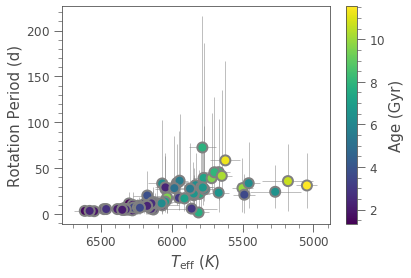

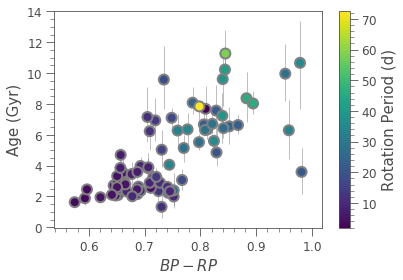

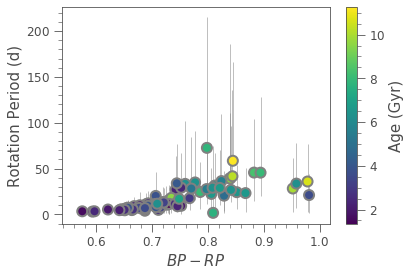

In [5]:
fig, ax = plt.subplots()
c = ax.scatter(ati.Teff, ati.P, c=ati.age, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.Teff, ati.P, xerr=ati.eTeff, yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')
# ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel(r'$T_{\rm eff}$ ($K$)')
ax.set_ylabel('Rotation Period (d)')
plt.gca().invert_xaxis()
fig.colorbar(c,label=r'Age (Gyr)')
plt.show()        

fig, ax = plt.subplots()
c = ax.scatter(ati.bprp, ati.age, c=ati.P, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.bprp, ati.age, yerr=[ati.loage, ati.upage],
            fmt='|', zorder=1, color='grey')    
ax.set_ylabel('Age (Gyr)')
ax.set_xlabel(r'$BP-RP$')
fig.colorbar(c,label='Rotation Period (d)')
plt.show()

fig, ax = plt.subplots()
c = ax.scatter(ati.bprp, ati.P, c=ati.age, lw=2, ec='grey',s=100, zorder=2)
plt.errorbar(ati.bprp, ati.P, yerr=[ati.l_P, ati.u_P],
            fmt='|', zorder=1, color='grey')        
ax.set_xlabel(r'$BP-RP$')
ax.set_ylabel('Rotation Period (d)')
fig.colorbar(c,label='Age (Gyr)')
plt.show()